## Iterative imputation in R, Random Forest using Python

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
features = ['Sex', 'Age', 'Current_smoker', 'Former_smoker',
       'Sedentary', 'Height', 'Weight', 'Cervical_perimeter',
       'Abdominal_perimeter', 'Systolic_BP', 'Diastolic_BP',
       'Maxillofacial_profile', 'BMI', 'High_BP', 'Asthma', 'Rhinitis', 'COPD',
       'Respiratory_fail', 'Myocardial_infarct', 'Coronary_fail',
       'Arrhythmias', 'Stroke', 'Heart_fail', 'Arteriopathy', 'Gastric_reflux',
       'Glaucoma', 'Diabetes', 'Hypercholesterolemia', 'Hypertriglyceridemia',
       'Hypo.er.thyroidism', 'Depression', 'Obesity', 'Dysmorphology',
       'Restless_Leg_Syndrome', 'Snoring', 'Diurnal_somnolence',
       'Driving_drowsiness', 'Morning_fatigue', 'Morning_headache',
       'Memory_problem', 'Nocturnal_perspiration',
       'Shortness_of_breath_on_exertion', 'Nocturia', 'Drowsiness_accident',
       'Near_miss_accident', 'Respiratory_arrest', 'Epworth_scale',
       'Pichots_scale', 'Depression_scale']
continuous = ['Age','Height','Weight','Cervical_perimeter','Abdominal_perimeter','Systolic_BP','Diastolic_BP', 
              'BMI','Epworth_scale','Pichots_scale','Depression_scale']
categorical = [i for i in features if i not in continuous]

### MICE

In [3]:
# mice 5 imputations, 5 iterations. PMM for continuous, logreg for categorical variables
mice_maxit5 = pd.read_csv("MICE_m5_it5.csv", index_col=0)

# mice 5 imputations, 20 iterations. PMM for continuous, logreg for categorical variables.
mice_imp1_maxit20 = pd.read_csv("mice_imp1_maxit20.csv", index_col=0) # imputation 1
mice_imp2_maxit20 = pd.read_csv("mice_imp2_maxit20.csv", index_col=0) # imputation 2
mice_imp3_maxit20 = pd.read_csv("mice_imp3_maxit20.csv", index_col=0) # imputation 3
mice_imp4_maxit20 = pd.read_csv("mice_imp4_maxit20.csv", index_col=0) # imputation 4
mice_imp5_maxit20 = pd.read_csv("mice_imp5_maxit20.csv", index_col=0) # imputation 5


In [4]:
mice_imp1_maxit20.head()

,PatientID,Sex,Age,Current_smoker,Former_smoker,Sedentary,Height,Weight,Cervical_perimeter,Abdominal_perimeter,...,Nocturnal_perspiration,Shortness_of_breath_on_exertion,Nocturia,Drowsiness_accident,Near_miss_accident,Respiratory_arrest,Epworth_scale,Pichots_scale,Depression_scale,Severity
1,1,2,35.167693,0,1,0,166,100.0,35.0,114.0,...,1,1,1,0,0,1,6,24,10,1
2,3,1,35.014374,0,0,0,178,96.0,44.0,109.0,...,1,0,1,0,0,0,9,2,1,3
3,4,1,48.802190,0,1,1,182,81.0,38.0,96.0,...,0,0,1,0,0,1,10,10,5,2
4,14,2,56.410678,0,0,0,165,88.0,38.0,110.0,...,1,0,1,0,0,0,4,15,6,3
5,15,1,71.600274,0,0,0,175,77.0,40.0,101.0,...,0,0,0,0,0,0,9,3,2,2


In [5]:
mice_imp1_maxit20['Sex'].value_counts()  # imputed missing sexes

1    51549
2    28841
Name: Sex, dtype: int64

In [18]:
mice_imp1_maxit20['Severity'].value_counts()

3    33552
2    17800
1    17617
0    11421
Name: Severity, dtype: int64

#### mice_maxit5 RF

In [4]:
X=mice_maxit5[features]  # Features  
y=mice_maxit5['Severity']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)

clf=RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state = 42)  #defining classifier method

clf.fit(X_train,y_train)                   # training classifier

y_pred=clf.predict(X_test)                  # testing classifier 

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.47082970518721234


In [7]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.43      0.29      0.34      2284
           1       0.34      0.24      0.28      3524
           2       0.30      0.08      0.13      3560
           3       0.52      0.86      0.65      6710

    accuracy                           0.47     16078
   macro avg       0.40      0.37      0.35     16078
weighted avg       0.42      0.47      0.41     16078



#### mice_imp1_maxit20 RF

In [8]:
X=mice_imp1_maxit20[features]  # Features  
y=mice_imp1_maxit20['Severity']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)

clf=RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state = 42)  #defining classifier method

clf.fit(X_train,y_train)                   # training classifier

y_pred=clf.predict(X_test)                  # testing classifier 

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4654185844010449


In [9]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.43      0.29      0.35      2284
           1       0.32      0.22      0.26      3524
           2       0.27      0.08      0.12      3560
           3       0.52      0.86      0.65      6710

    accuracy                           0.47     16078
   macro avg       0.38      0.36      0.34     16078
weighted avg       0.41      0.47      0.40     16078



#### mice_imp2_maxit20 RF

In [19]:
X=mice_imp2_maxit20[features]  # Features  
y=mice_imp2_maxit20['Severity']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)

clf=RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state = 42)  #defining classifier method

clf.fit(X_train,y_train)                   # training classifier

y_pred=clf.predict(X_test)                  # testing classifier 

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4700211469088195


In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.42      0.29      0.34      2284
           1       0.33      0.23      0.27      3524
           2       0.27      0.08      0.12      3560
           3       0.52      0.87      0.65      6710

    accuracy                           0.47     16078
   macro avg       0.39      0.37      0.35     16078
weighted avg       0.41      0.47      0.41     16078



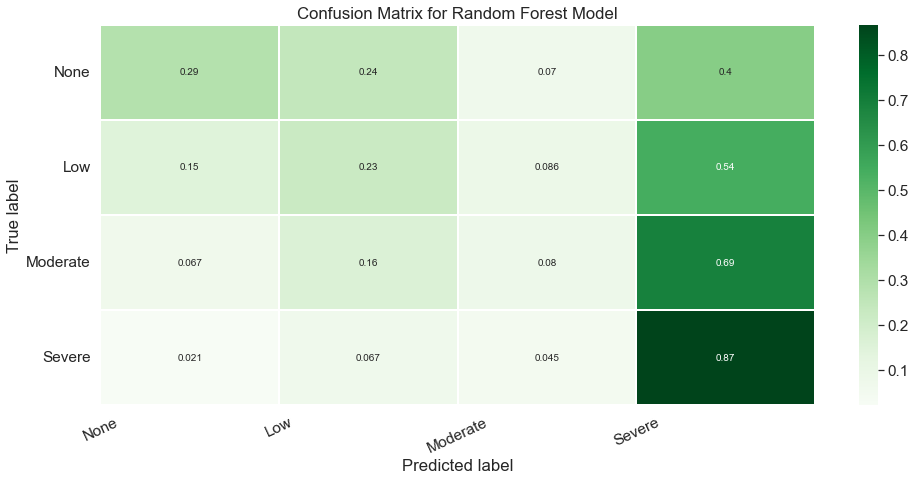

In [20]:
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['None', 'Low', 'Moderate', 
               'Severe']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [ ]:
# Most moderate classified as severe

#### mice_imp3_maxit20 RF

In [12]:
X=mice_imp3_maxit20[features]  # Features  
y=mice_imp3_maxit20['Severity']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)

clf=RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state = 42)  #defining classifier method

clf.fit(X_train,y_train)                   # training classifier

y_pred=clf.predict(X_test)                  # testing classifier 

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4621843512874736


In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.42      0.29      0.34      2284
           1       0.32      0.22      0.26      3524
           2       0.24      0.07      0.11      3560
           3       0.52      0.86      0.65      6710

    accuracy                           0.46     16078
   macro avg       0.38      0.36      0.34     16078
weighted avg       0.40      0.46      0.40     16078



#### mice_imp4_maxit20 RF

In [14]:
X=mice_imp4_maxit20[features]  # Features  
y=mice_imp4_maxit20['Severity']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)

clf=RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state = 42)  #defining classifier method

clf.fit(X_train,y_train)                   # training classifier

y_pred=clf.predict(X_test)                  # testing classifier 

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.467284488120413


In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.42      0.28      0.34      2284
           1       0.33      0.23      0.27      3524
           2       0.27      0.07      0.12      3560
           3       0.52      0.86      0.65      6710

    accuracy                           0.47     16078
   macro avg       0.39      0.36      0.34     16078
weighted avg       0.41      0.47      0.40     16078



#### mice_imp5_maxit20 RF

In [16]:
X=mice_imp5_maxit20[features]  # Features  
y=mice_imp5_maxit20['Severity']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)

clf=RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state = 42)  #defining classifier method

clf.fit(X_train,y_train)                   # training classifier

y_pred=clf.predict(X_test)                  # testing classifier 

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.46436123896006964


In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.42      0.28      0.34      2284
           1       0.32      0.22      0.26      3524
           2       0.27      0.08      0.13      3560
           3       0.52      0.86      0.65      6710

    accuracy                           0.46     16078
   macro avg       0.38      0.36      0.34     16078
weighted avg       0.41      0.46      0.40     16078



#### HMISC 4 iterations 1 imputation 

In [35]:
hmisc = pd.read_csv("completed_hmisc_impute1.csv", index_col=0)

In [36]:
hmisc.head()

,Sex,Age,Current_smoker,Former_smoker,Sedentary,Height,Weight,Cervical_perimeter,Abdominal_perimeter,Systolic_BP,...,Memory_problem,Nocturnal_perspiration,Shortness_of_breath_on_exertion,Nocturia,Drowsiness_accident,Near_miss_accident,Respiratory_arrest,Epworth_scale,Pichots_scale,Depression_scale
1,2,35.167693,0,1,0,166,100.0,35.0,114.0,110.0,...,0,1,1,1,0,0,1,6,24,10
2,1,35.014374,0,0,0,178,96.0,44.0,109.0,110.0,...,0,1,0,1,0,0,0,9,2,1
3,1,48.802190,0,1,1,182,81.0,38.0,96.0,180.0,...,0,0,0,1,0,0,1,10,10,5
4,2,56.410678,0,0,0,165,88.0,38.0,110.0,130.0,...,0,1,0,1,0,0,0,4,15,6
5,1,71.600274,0,0,0,175,77.0,40.0,101.0,130.0,...,0,0,0,0,0,0,0,9,3,2


In [37]:
hmisc['Severity'] = mice_imp4_maxit20['Severity'] # Severity column was removed. Adding it back

In [38]:
hmisc.head()

,Sex,Age,Current_smoker,Former_smoker,Sedentary,Height,Weight,Cervical_perimeter,Abdominal_perimeter,Systolic_BP,...,Nocturnal_perspiration,Shortness_of_breath_on_exertion,Nocturia,Drowsiness_accident,Near_miss_accident,Respiratory_arrest,Epworth_scale,Pichots_scale,Depression_scale,Severity
1,2,35.167693,0,1,0,166,100.0,35.0,114.0,110.0,...,1,1,1,0,0,1,6,24,10,1
2,1,35.014374,0,0,0,178,96.0,44.0,109.0,110.0,...,1,0,1,0,0,0,9,2,1,3
3,1,48.802190,0,1,1,182,81.0,38.0,96.0,180.0,...,0,0,1,0,0,1,10,10,5,2
4,2,56.410678,0,0,0,165,88.0,38.0,110.0,130.0,...,1,0,1,0,0,0,4,15,6,3
5,1,71.600274,0,0,0,175,77.0,40.0,101.0,130.0,...,0,0,0,0,0,0,9,3,2,2


In [39]:
X=hmisc[features]  # Features  
y=hmisc['Severity']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)

clf=RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state = 42)  #defining classifier method

clf.fit(X_train,y_train)                   # training classifier

y_pred=clf.predict(X_test)                  # testing classifier 

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.46771986565493223


In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.42      0.28      0.34      2284
           1       0.33      0.22      0.26      3524
           2       0.28      0.08      0.12      3560
           3       0.52      0.87      0.65      6710

    accuracy                           0.47     16078
   macro avg       0.39      0.36      0.34     16078
weighted avg       0.41      0.47      0.41     16078



### mice_imp5_maxit5 Varying class weights

##### Viewing sample weights

In [8]:
from sklearn.utils import class_weight

In [13]:
sample_weights_bal = class_weight.compute_class_weight(class_weight = 'balanced', classes = (0,1,2,3), y = y_train)

In [14]:
sample_weights_bal

array([1.75965853, 1.14085007, 1.12907303, 0.59898666])

In [5]:
X=mice_maxit5[features]  # Features  
y=mice_maxit5['Severity']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)

clf=RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state = 42)  #defining classifier method

clf.fit(X_train,y_train)                   # training classifier

y_pred=clf.predict(X_test)                  # testing classifier 

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.47082970518721234


##### As such, it might be interesting to change the class weighting based on the class distribution in each bootstrap sample, instead of the entire training dataset.

This can be achieved by setting the class_weight argument to the value ‘balanced_subsample‘.

from: https://machinelearningmastery.com/bagging-and-random-forest-for-imbalanced-classification/

In [6]:
clf=RandomForestClassifier(n_estimators=100, class_weight='balanced_subsample', random_state = 42)  #defining classifier method

clf.fit(X_train,y_train)                   # training classifier

y_pred=clf.predict(X_test)                  # testing classifier 

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.47101629555914915


In [18]:
sample_weight_1 = {0:1.8, 1:1.5, 2:1.3, 3:0.43}

In [19]:
clf=RandomForestClassifier(n_estimators=100, class_weight=sample_weight_1, random_state = 42)  #defining classifier method

clf.fit(X_train,y_train)                   # training classifier

y_pred=clf.predict(X_test)                  # testing classifier 

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.46591615872620973


In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.42      0.28      0.34      2284
           1       0.32      0.23      0.27      3524
           2       0.26      0.08      0.12      3560
           3       0.52      0.86      0.65      6710

    accuracy                           0.47     16078
   macro avg       0.38      0.36      0.34     16078
weighted avg       0.41      0.47      0.40     16078



In [21]:
sample_weights = {0:1.8, 1:1.5, 2:2, 3:0.3}

clf=RandomForestClassifier(n_estimators=100, class_weight=sample_weights, random_state = 42)  #defining classifier method

clf.fit(X_train,y_train)                   # training classifier

y_pred=clf.predict(X_test)                  # testing classifier 

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.47213583779077


In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.43      0.29      0.34      2284
           1       0.35      0.22      0.27      3524
           2       0.29      0.07      0.12      3560
           3       0.52      0.88      0.65      6710

    accuracy                           0.47     16078
   macro avg       0.40      0.37      0.35     16078
weighted avg       0.42      0.47      0.41     16078



In [23]:
sample_weights = {0:3, 1:4, 2:5, 3:1}

clf=RandomForestClassifier(n_estimators=100, class_weight=sample_weights, random_state = 42)  #defining classifier method

clf.fit(X_train,y_train)                   # training classifier

y_pred=clf.predict(X_test)                  # testing classifier 

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4675332752829954


In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.42      0.27      0.33      2284
           1       0.33      0.22      0.27      3524
           2       0.27      0.07      0.11      3560
           3       0.52      0.87      0.65      6710

    accuracy                           0.47     16078
   macro avg       0.38      0.36      0.34     16078
weighted avg       0.41      0.47      0.40     16078



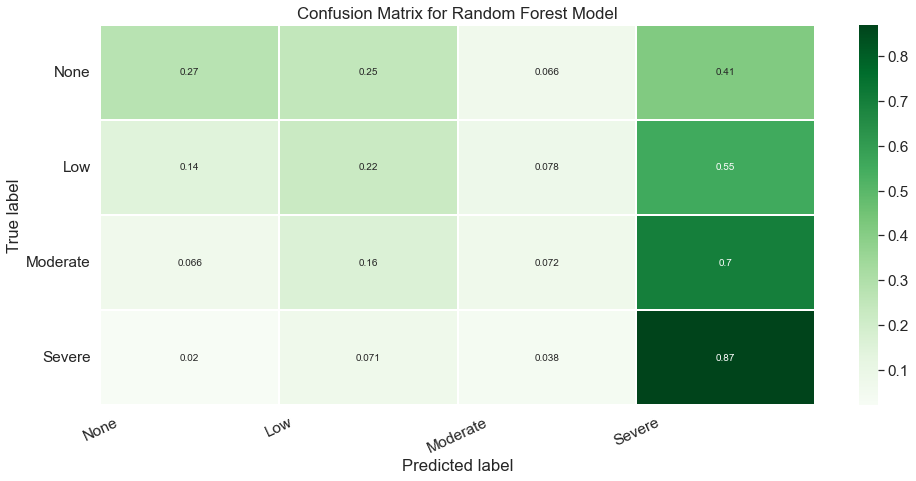

In [25]:
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['None', 'Low', 'Moderate', 
               'Severe']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [26]:
sample_weights = {0:3, 1:4, 2:5, 3:0}

clf=RandomForestClassifier(n_estimators=100, class_weight=sample_weights, random_state = 42)  #defining classifier method

clf.fit(X_train,y_train)                   # training classifier

y_pred=clf.predict(X_test)                  # testing classifier 

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.2564995646224655


In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.41      0.29      0.34      2284
           1       0.27      0.43      0.33      3524
           2       0.22      0.55      0.32      3560
           3       0.00      0.00      0.00      6710

    accuracy                           0.26     16078
   macro avg       0.23      0.32      0.25     16078
weighted avg       0.17      0.26      0.19     16078



C:\Users\40331980\.conda\envs\Amonae\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\40331980\.conda\envs\Amonae\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\40331980\.conda\envs\Amonae\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
sample_weights = {0:3, 1:4, 2:5, 3:0.1}

clf=RandomForestClassifier(n_estimators=100, class_weight=sample_weights, random_state = 42)  #defining classifier method

clf.fit(X_train,y_train)                   # training classifier

y_pred=clf.predict(X_test)                  # testing classifier 

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4700833436994651


In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.41      0.28      0.33      2284
           1       0.34      0.21      0.26      3524
           2       0.29      0.07      0.11      3560
           3       0.52      0.88      0.65      6710

    accuracy                           0.47     16078
   macro avg       0.39      0.36      0.34     16078
weighted avg       0.41      0.47      0.40     16078



In [30]:
sample_weights = {0:2, 1:2, 2:5, 3:0.1}

clf=RandomForestClassifier(n_estimators=100, class_weight=sample_weights, random_state = 42)  #defining classifier method

clf.fit(X_train,y_train)                   # training classifier

y_pred=clf.predict(X_test)                  # testing classifier 

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.47201144420947877


In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.28      0.34      2284
           1       0.35      0.23      0.27      3524
           2       0.27      0.06      0.10      3560
           3       0.52      0.88      0.65      6710

    accuracy                           0.47     16078
   macro avg       0.39      0.36      0.34     16078
weighted avg       0.41      0.47      0.40     16078



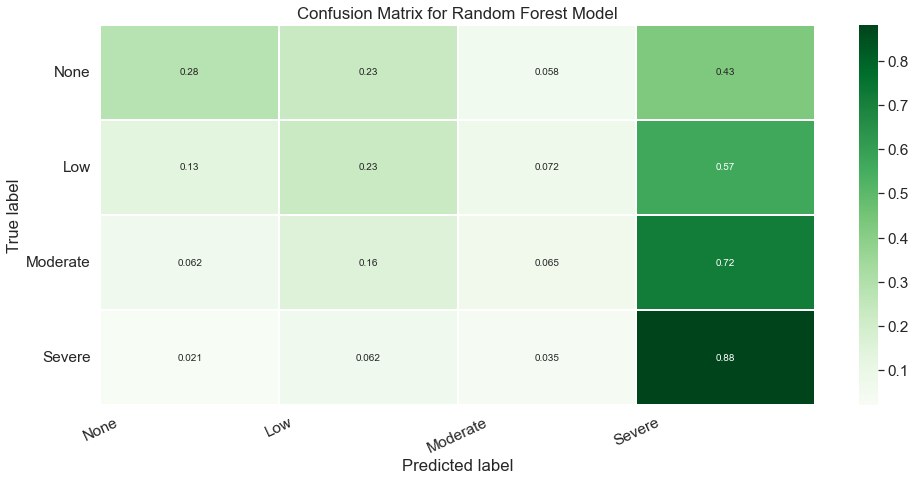

In [32]:
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['None', 'Low', 'Moderate', 
               'Severe']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [33]:
sample_weights = {0:0.1, 1:0.1, 2:5, 3:0.1}

clf=RandomForestClassifier(n_estimators=100, class_weight=sample_weights, random_state = 42)  #defining classifier method

clf.fit(X_train,y_train)                   # training classifier

y_pred=clf.predict(X_test)                  # testing classifier 

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4674088817017042


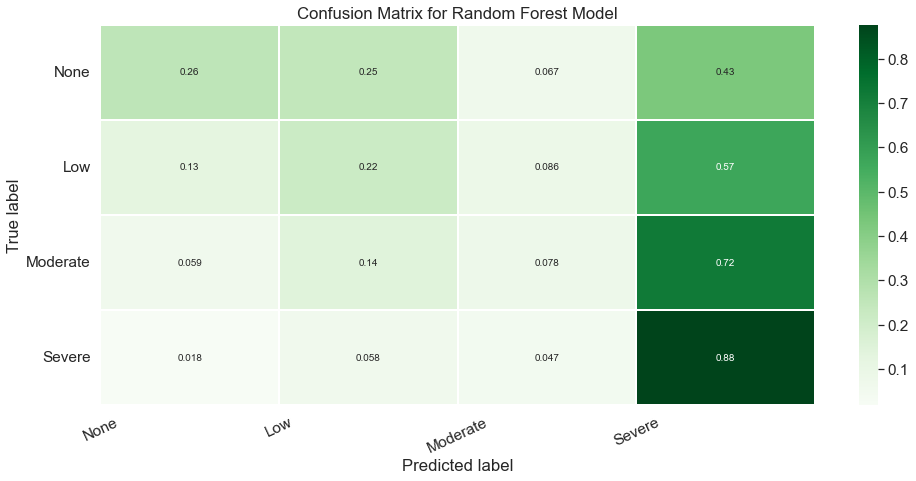

In [34]:
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['None', 'Low', 'Moderate', 
               'Severe']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()